In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import load_processed_data as ld
from collections import defaultdict
from decimal import Decimal
from definitions import MODELS_PATH
from sklearn import metrics
from keras.models import load_model

Using TensorFlow backend.


In [5]:
def get_confusion_matrix_df(y_true, y_pred, y_labels):
    """This function creates a confusion matrix.
    
    Input arguments:
        y_true - 1-D Array of true encoded target values.
        y_pred - 1-D Array of predicted encoded target values.
        y_labels - List of class names.
        
    This function returns a DataFrame object."""

    # get class names in a format that is presentable
    y_class_titles = [s.replace('_',' ').title() for s in y_labels]
    
    # confusion matrix
    cm = metrics.confusion_matrix(y_true, y_pred)

    # dataframe with the confusion matrix
    df_cm = pd.DataFrame(data=cm,
                         index=y_class_titles,
                         columns=y_class_titles)

    # set index name and column name
    df_cm.index.name = 'Actual Class'
    df_cm.columns.name = 'Predicted Class'
    
    # return the dataframe
    return df_cm

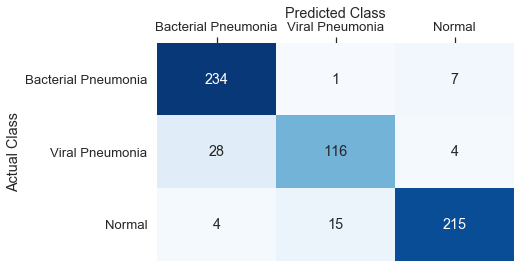

In [17]:
def get_confusion_matrix_heatmap_figure(df_cm):
    """This function creates a heatmap of a confusion matrix.
    
    Input arguments:
        df_cm - DataFrame with the confusion matrix.
        
    This function returns a Figure object."""
    
    # create a figure
    fig = plt.figure(figsize=(6.4, 4))

    # get the figure's axis
    ax = fig.gca()

    # set seaborn font scale
    sns.set(font_scale=1.2)

    # plot heatmap
    ax = sns.heatmap(df_cm,
                     annot=True,
                     fmt=".0f",
                     cbar=False,
                     cmap='Blues',
                     vmin=0,
                     vmax=df_cm.sum(axis=1).max())

    # move xaxis ticks and labels to top
    ax.xaxis.set_ticks_position('top')
    ax.xaxis.set_label_position('top')
    
    # return the figure
    return fig

In [14]:
def get_classification_report_df(y_true, y_pred, y_labels)
    """This function creates a classification report.
    
    Input arguments:
        y_true - 1-D Array of true encoded target values.
        y_pred - 1-D Array of predicted encoded target values.
        y_labels - List of class names.
        
    This function returns a DataFrame object."""

    # get class names in a format that is presentable
    y_class_titles = [s.replace('_',' ').title() for s in y_labels]
    
    # make a classification report
    report = metrics.classification_report(y_true,
                                           y_pred,
                                           target_names=y_class_titles,
                                           output_dict=True)

    # make a dataframe with the classification report
    df_report = pd.DataFrame(report).transpose()

    # rename the averages to be presentable
    index_map = {'micro avg':'Micro Average',
                 'macro avg': 'Macro Average',
                 'weighted avg': 'Weighted Average'}
    df_report.rename(index=index_map,
                     inplace=True)
    
    # return the dataframe
    return df_report

In [58]:
def get_classification_report_figure(df_report):
    """This function creates a table of a classification report.
    
    Input arguments:
        df_report - DataFrame with the classification report.
        
    This function returns a Figure object."""
    
    # create a figure
    fig = plt.figure(figsize=(6.4, 4))

    # get the figure's axis
    ax = fig.gca()

    # do not display the axis
    ax.axis('off')

    # create a table from the pivot table
    t = ax.table(cellText=df_report.values,
                 cellLoc='center',
                 rowLabels=df_report.index,
                 colLabels=df_report.columns,
                 loc='right',
                 bbox=[0, 0, 1, 1])

    # format the cells
    for x in range(4):
        t[0, x].set_facecolor('#ffdccc')  # light orange
        t[0, x].set_text_props(fontweight='bold')  
        
    for y in np.arange(1, 4):
        t[y, -1].set_facecolor('#d1e5fa')  # light blue
        t[y, -1].set_text_props(fontweight='bold')

    for y in np.arange(4, 7):
        t[y, -1].set_facecolor('#8cbef2')  # blue
        t[y, -1].set_text_props(fontweight='bold')
        
    # set number of digits to display
    for y in range(1, 7):
        t[y, 3].get_text().set_text(t[y, 3].get_text().get_text().split('.')[0])
        for x in range(3):
            t[y, x].get_text().set_text(str(round(float(t[y, x].get_text().get_text()),2)))
        
    # set the font size
    t.auto_set_font_size(False)
    t.set_fontsize(12)

    # return the figure
    return fig